# Step One: Getting Data

### Download stock data and save it as csv

In [1]:
# Import requirements
import subprocess, os
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [2]:
# Choose stock and frequency
stock = 'AAPL'
freq = 'daily'
folder = 'stocks/'
base_wd = '/Users/jeffrey_yuan/Documents/8_Projects/algotrading/'
os.chdir(base_wd)

In [3]:
# Call save_data_to_csv on stock
os.chdir(base_wd+folder)
print(os.getcwd())
print(os.listdir())
subprocess.call(['python','save_data_to_csv.py', stock, freq])

/Users/jeffrey_yuan/Documents/8_Projects/algotrading/stocks
['AMZN_daily_adj.csv', 'AAPL_daily.csv', 'MSFT_daily_adj.csv', 'AAPL_intraday.csv', 'BAC_daily_adj.csv', 'AAPL_daily_adj.csv', 'ILMN_daily_adj.csv', 'GOOGL_daily_adj.csv', 'save_crypto_to_csv.py', 'FB_daily_adj.csv', 'SQ_daily_adj.csv', 'ABNB_daily_adj.csv', 'BAC_daily.csv', 'ZIM_daily.csv', 'creds.json', 'LAC_daily_adj.csv', 'ABNB_intraday.csv', 'ZIM_intraday.csv', 'SPY_daily_adj.csv', 'SQ_intraday.csv', 'ABNB_daily.csv', 'TSLA_daily.csv', 'ZIM_daily_adj.csv', 'save_data_to_csv.py', '.ipynb_checkpoints', 'BAC_intraday.csv', 'JPM_daily_adj.csv', 'TSLA_daily_adj.csv', 'C_daily_adj.csv', 'BTC_USD_daily.csv', 'GOOG_daily_adj.csv', 'MSFT_daily.csv']


0

In [18]:
# Show files in directory to confirm new file
print(os.getcwd())
sorted(os.listdir(base_wd+folder))

/Users/jeffrey_yuan/Documents/8_Projects/algotrading/stocks


['.ipynb_checkpoints',
 'AAPL_daily.csv',
 'AAPL_daily_adj.csv',
 'AAPL_intraday.csv',
 'ABNB_daily.csv',
 'ABNB_daily_adj.csv',
 'ABNB_intraday.csv',
 'AMZN_daily_adj.csv',
 'BAC_daily.csv',
 'BAC_daily_adj.csv',
 'BAC_intraday.csv',
 'BTC_USD_daily.csv',
 'C_daily_adj.csv',
 'FB_daily_adj.csv',
 'GOOGL_daily_adj.csv',
 'GOOG_daily_adj.csv',
 'ILMN_daily_adj.csv',
 'JPM_daily_adj.csv',
 'LAC_daily_adj.csv',
 'MSFT_daily.csv',
 'MSFT_daily_adj.csv',
 'SPY_daily_adj.csv',
 'SQ_daily_adj.csv',
 'SQ_intraday.csv',
 'TSLA_daily.csv',
 'TSLA_daily_adj.csv',
 'ZIM_daily.csv',
 'ZIM_daily_adj.csv',
 'ZIM_intraday.csv',
 'creds.json',
 'save_crypto_to_csv.py',
 'save_data_to_csv.py']

### Taking a first look at the daily data

In [4]:
# Stock
os.chdir(base_wd)
csv_path = "{}{}_{}.csv".format(folder, stock, freq)
daily = pd.read_csv(csv_path)

In [6]:
# See what the data looks like
print(daily)
for col in daily.columns:
    print(col)

            date  1. open  2. high    3. low  4. close    5. volume
0     2021-10-29  147.215  149.940  146.4128    149.80  124953168.0
1     2021-10-28  149.820  153.165  149.7200    152.57  100077888.0
2     2021-10-27  149.360  149.730  148.4900    148.85   56094929.0
3     2021-10-26  149.330  150.840  149.0101    149.32   60893395.0
4     2021-10-25  148.680  149.370  147.6211    148.64   50720556.0
...          ...      ...      ...       ...       ...          ...
5531  1999-11-05   84.620   88.370   84.0000     88.31    3721500.0
5532  1999-11-04   82.060   85.370   80.6200     83.62    3384700.0
5533  1999-11-03   81.620   83.250   81.0000     81.50    2932700.0
5534  1999-11-02   78.000   81.690   77.3100     80.25    3564600.0
5535  1999-11-01   80.000   80.690   77.3700     77.62    2487300.0

[5536 rows x 6 columns]
date
1. open
2. high
3. low
4. close
5. volume


In [7]:
# Print the last 6 days worth of data
print(daily[:6])

         date  1. open  2. high    3. low  4. close    5. volume
0  2021-10-29  147.215  149.940  146.4128    149.80  124953168.0
1  2021-10-28  149.820  153.165  149.7200    152.57  100077888.0
2  2021-10-27  149.360  149.730  148.4900    148.85   56094929.0
3  2021-10-26  149.330  150.840  149.0101    149.32   60893395.0
4  2021-10-25  148.680  149.370  147.6211    148.64   50720556.0
5  2021-10-22  149.690  150.180  148.6400    148.69   58883443.0


In [8]:
# Print just the close
print(daily["4. close"][:6])

0    149.80
1    152.57
2    148.85
3    149.32
4    148.64
5    148.69
Name: 4. close, dtype: float64


In [9]:
# Reverse data to get chronological order
rev_daily = daily.iloc[::-1]

In [10]:
# See what the reversed data looks like
print(rev_daily)
for col in rev_daily.columns:
    print(col)

            date  1. open  2. high    3. low  4. close    5. volume
5535  1999-11-01   80.000   80.690   77.3700     77.62    2487300.0
5534  1999-11-02   78.000   81.690   77.3100     80.25    3564600.0
5533  1999-11-03   81.620   83.250   81.0000     81.50    2932700.0
5532  1999-11-04   82.060   85.370   80.6200     83.62    3384700.0
5531  1999-11-05   84.620   88.370   84.0000     88.31    3721500.0
...          ...      ...      ...       ...       ...          ...
4     2021-10-25  148.680  149.370  147.6211    148.64   50720556.0
3     2021-10-26  149.330  150.840  149.0101    149.32   60893395.0
2     2021-10-27  149.360  149.730  148.4900    148.85   56094929.0
1     2021-10-28  149.820  153.165  149.7200    152.57  100077888.0
0     2021-10-29  147.215  149.940  146.4128    149.80  124953168.0

[5536 rows x 6 columns]
date
1. open
2. high
3. low
4. close
5. volume


### Looking at daily adjusted data

In [25]:
# Choose stock and frequency
#stock = 'MSFT'
freq = 'daily_adj'

In [26]:
# Call save_data_to_csv on stock
os.chdir(base_wd+folder)
subprocess.call(['python','save_data_to_csv.py', stock, freq])

0

In [27]:
# Show files in directory to confirm new file
print(os.getcwd())
sorted(os.listdir())

/Users/jeffrey_yuan/Documents/8_Projects/algotrading/stocks


['.ipynb_checkpoints',
 'AAPL_daily.csv',
 'AAPL_daily_adj.csv',
 'AAPL_intraday.csv',
 'ABNB_daily.csv',
 'ABNB_daily_adj.csv',
 'ABNB_intraday.csv',
 'AMZN_daily_adj.csv',
 'BAC_daily.csv',
 'BAC_daily_adj.csv',
 'BAC_intraday.csv',
 'BTC_USD_daily.csv',
 'C_daily_adj.csv',
 'FB_daily_adj.csv',
 'GOOGL_daily_adj.csv',
 'GOOG_daily_adj.csv',
 'ILMN_daily_adj.csv',
 'JPM_daily_adj.csv',
 'LAC_daily_adj.csv',
 'MSFT_daily.csv',
 'MSFT_daily_adj.csv',
 'SPY_daily_adj.csv',
 'SQ_daily_adj.csv',
 'SQ_intraday.csv',
 'TSLA_daily.csv',
 'TSLA_daily_adj.csv',
 'ZIM_daily.csv',
 'ZIM_daily_adj.csv',
 'ZIM_intraday.csv',
 'creds.json',
 'save_crypto_to_csv.py',
 'save_data_to_csv.py']

In [28]:
os.chdir(base_wd)
csv_path = "{}{}_{}.csv".format(folder, stock, freq)
dadj = pd.read_csv(csv_path)

In [29]:
# See what the data looks like
print(dadj)
for col in dadj.columns:
    print(col)

            date  1. open  2. high    3. low  4. close  5. adjusted close  \
0     2021-10-27   149.36   149.73  148.4900    148.85         148.850000   
1     2021-10-26   149.33   150.84  149.0101    149.32         149.320000   
2     2021-10-25   148.68   149.37  147.6211    148.64         148.640000   
3     2021-10-22   149.69   150.18  148.6400    148.69         148.690000   
4     2021-10-21   148.81   149.64  147.8700    149.48         149.480000   
...          ...      ...      ...       ...       ...                ...   
5529  1999-11-05    84.62    88.37   84.0000     88.31           0.676918   
5530  1999-11-04    82.06    85.37   80.6200     83.62           0.640968   
5531  1999-11-03    81.62    83.25   81.0000     81.50           0.624717   
5532  1999-11-02    78.00    81.69   77.3100     80.25           0.615136   
5533  1999-11-01    80.00    80.69   77.3700     77.62           0.594976   

       6. volume  7. dividend amount  8. split coefficient  
0     56094929

In [30]:
# Print the last 6 days worth of data
print(dadj[:6])

         date  1. open   2. high    3. low  4. close  5. adjusted close  \
0  2021-10-27   149.36  149.7300  148.4900    148.85             148.85   
1  2021-10-26   149.33  150.8400  149.0101    149.32             149.32   
2  2021-10-25   148.68  149.3700  147.6211    148.64             148.64   
3  2021-10-22   149.69  150.1800  148.6400    148.69             148.69   
4  2021-10-21   148.81  149.6400  147.8700    149.48             149.48   
5  2021-10-20   148.70  149.7539  148.1200    149.26             149.26   

    6. volume  7. dividend amount  8. split coefficient  
0  56094929.0                 0.0                   1.0  
1  60893395.0                 0.0                   1.0  
2  50720556.0                 0.0                   1.0  
3  58883443.0                 0.0                   1.0  
4  61420990.0                 0.0                   1.0  
5  58418788.0                 0.0                   1.0  


In [31]:
# Print just the close
print(dadj["4. close"][:6])

0    148.85
1    149.32
2    148.64
3    148.69
4    149.48
5    149.26
Name: 4. close, dtype: float64


### Checking out the intraday data

In [32]:
# Choose stock and frequency
#stock = 'AAPL'
freq = 'intraday'

In [33]:
# Call save_data_to_csv on stock
os.chdir(base_wd+folder)
subprocess.call(['python','save_data_to_csv.py', stock, freq])

0

In [34]:
# Show files in directory to confirm new file
print(os.getcwd())
sorted(os.listdir())

/Users/jeffrey_yuan/Documents/8_Projects/algotrading/stocks


['.ipynb_checkpoints',
 'AAPL_daily.csv',
 'AAPL_daily_adj.csv',
 'AAPL_intraday.csv',
 'ABNB_daily.csv',
 'ABNB_daily_adj.csv',
 'ABNB_intraday.csv',
 'AMZN_daily_adj.csv',
 'BAC_daily.csv',
 'BAC_daily_adj.csv',
 'BAC_intraday.csv',
 'BTC_USD_daily.csv',
 'C_daily_adj.csv',
 'FB_daily_adj.csv',
 'GOOGL_daily_adj.csv',
 'GOOG_daily_adj.csv',
 'ILMN_daily_adj.csv',
 'JPM_daily_adj.csv',
 'LAC_daily_adj.csv',
 'MSFT_daily.csv',
 'MSFT_daily_adj.csv',
 'SPY_daily_adj.csv',
 'SQ_daily_adj.csv',
 'SQ_intraday.csv',
 'TSLA_daily.csv',
 'TSLA_daily_adj.csv',
 'ZIM_daily.csv',
 'ZIM_daily_adj.csv',
 'ZIM_intraday.csv',
 'creds.json',
 'save_crypto_to_csv.py',
 'save_data_to_csv.py']

In [35]:
os.chdir(base_wd)
csv_path = "{}{}_{}.csv".format(folder, stock, freq)
intraday = pd.read_csv(csv_path)

In [36]:
# See what the data looks like
print(intraday)
for col in intraday.columns:
    print(col)

                     date  1. open  2. high  3. low  4. close  5. volume
0     2021-10-27 20:00:00   149.08   149.08  149.06    149.07     1051.0
1     2021-10-27 19:59:00   149.07   149.08  149.07    149.08     2180.0
2     2021-10-27 19:58:00   149.00   149.05  149.00    149.05     3676.0
3     2021-10-27 19:57:00   149.06   149.06  149.00    149.00     1385.0
4     2021-10-27 19:56:00   149.01   149.07  149.00    149.07     1116.0
...                   ...      ...      ...     ...       ...        ...
8633  2021-10-13 04:05:00   140.20   140.20  140.20    140.20      435.0
8634  2021-10-13 04:04:00   140.28   140.30  140.20    140.20     2867.0
8635  2021-10-13 04:03:00   140.35   140.35  140.35    140.35      632.0
8636  2021-10-13 04:02:00   140.35   140.40  140.20    140.40     3052.0
8637  2021-10-13 04:01:00   140.20   140.40  140.00    140.40     6084.0

[8638 rows x 6 columns]
date
1. open
2. high
3. low
4. close
5. volume


In [37]:
# Print the last 6 minutes worth of data (while markets are open)
print(intraday[:6])

                  date  1. open  2. high  3. low  4. close  5. volume
0  2021-10-27 20:00:00   149.08   149.08  149.06    149.07     1051.0
1  2021-10-27 19:59:00   149.07   149.08  149.07    149.08     2180.0
2  2021-10-27 19:58:00   149.00   149.05  149.00    149.05     3676.0
3  2021-10-27 19:57:00   149.06   149.06  149.00    149.00     1385.0
4  2021-10-27 19:56:00   149.01   149.07  149.00    149.07     1116.0
5  2021-10-27 19:55:00   149.02   149.05  149.01    149.01    12414.0


In [38]:
# Print just the close
print(intraday["4. close"][:6])

0    149.07
1    149.08
2    149.05
3    149.00
4    149.07
5    149.01
Name: 4. close, dtype: float64


# Step Two: Calculating Technical Indicators

### Averages

In [39]:
# SMA - Simple Moving Average
# Use built-in function to calculate SMA on daily data
length = 6
#rev_daily = rev_daily.drop(columns=["6-day SMA"])
print(rev_daily)
rev_daily["6-day SMA"] = rev_daily.rolling(window=length)["4. close"].mean()
print(rev_daily)

            date  1. open  2. high    3. low  4. close   5. volume
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0
...          ...      ...      ...       ...       ...         ...
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0

[5534 rows x 6 columns]
            date  1. open  2. high    3. low  4. close   5. volume   6-day SMA
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0         NaN
5532  1999-11

/Users/jeffrey_yuan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
# SMA Add Function
def add_sma(data, header, length, label):
    data[label] = data.rolling(window=length)[header].mean()

In [41]:
# Test SMA Add Function
header = "4. close"
length = 6
label = "{}-day SMA".format(length)
rev_daily = rev_daily.drop(columns=[label])
print("Before adding SMA")
print(rev_daily)
add_sma(rev_daily, header, length, label)
print("\nAfter adding SMA")
print(rev_daily)

Before adding SMA
            date  1. open  2. high    3. low  4. close   5. volume
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0
...          ...      ...      ...       ...       ...         ...
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0

[5534 rows x 6 columns]

After adding SMA
            date  1. open  2. high    3. low  4. close   5. volume   6-day SMA
5533  1999-11-01    80.00    80.69   77.3700     77.62  

In [42]:
# It is common to look at 50-, 100-, and 200-day moving averages
# If 50-day is above 200-day moving average, stock is bullish. A crossover to the downside is bearish.
length = 50
label = "{}-day SMA".format(length)
add_sma(rev_daily, header, length, label)
length = 100
label = "{}-day SMA".format(length)
add_sma(rev_daily, header, length, label)
length = 200
label = "{}-day SMA".format(length)
add_sma(rev_daily, header, length, label)
print(rev_daily)

            date  1. open  2. high    3. low  4. close   5. volume  \
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...          ...      ...      ...       ...       ...         ...   
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA  
5533         NaN         NaN          NaN          NaN  
5532         NaN         NaN          NaN    

In [43]:
# EMA - Exponential Moving Average
# Use built-in function to calculate EMA on daily data
# Note: Span follows the following formula:
# Specify decay in terms of span, 𝛼=2/(𝑠𝑝𝑎𝑛+1), for 𝑠𝑝𝑎𝑛≥1.
length = 6
rev_daily["6-day EMA"] = rev_daily.ewm(span=length)["4. close"].mean()
print(rev_daily)

            date  1. open  2. high    3. low  4. close   5. volume  \
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...          ...      ...      ...       ...       ...         ...   
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA   6-day EMA  
5533         NaN         NaN          NaN          NaN   77.620000  
5532         NaN     

In [44]:
# EMA Add Function
def add_ema(data, header, length, label):
    data[label] = data.ewm(span=length)[header].mean()

In [45]:
# Test EMA Add Function
header = "4. close"
length = 6
label = "{}-day EMA".format(length)
rev_daily = rev_daily.drop(columns=[label])
print("Before adding EMA")
print(rev_daily)
add_ema(rev_daily, header, length, label)
print("\nAfter adding EMA")
print(rev_daily)

Before adding EMA
            date  1. open  2. high    3. low  4. close   5. volume  \
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...          ...      ...      ...       ...       ...         ...   
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA  
5533         NaN         NaN          NaN          NaN  
5532         NaN         Na

In [46]:
# MACD - Moving Average Convergence Divergence
# Calculated as MACD = EMA(short) - EMA(long)
short = 12
long = 26
header = "4. close"
short_lab = "{}-day EMA".format(short)
long_lab = "{}-day EMA".format(long)
add_ema(rev_daily, header, short, short_lab)
add_ema(rev_daily, header, long, long_lab)
rev_daily["MACD"] = rev_daily.loc[:,short_lab] - rev_daily.loc[:,long_lab]
print(rev_daily)

            date  1. open  2. high    3. low  4. close   5. volume  \
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...          ...      ...      ...       ...       ...         ...   
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA   6-day EMA  \
5533         NaN         NaN          NaN          NaN   77.620000   
5532         NaN   

In [47]:
# MACD Add Function
def add_macd(data, header, short, short_lab, long, long_lab):
    add_ema(data, header, short, short_lab)
    add_ema(data, header, long, long_lab)
    data["MACD"] = data.loc[:,short_lab] - data.loc[:,long_lab]

In [48]:
# Test MACD Add Function
header = "4. close"
short = 12
long = 26
short_lab = "{}-day EMA".format(short)
long_lab = "{}-day EMA".format(long)
rev_daily = rev_daily.drop(columns=["MACD"])
print("Before adding MACD")
print(rev_daily)
add_macd(rev_daily, header, short, short_lab, long, long_lab)
print("\nAfter adding MACD")
print(rev_daily)

Before adding MACD
            date  1. open  2. high    3. low  4. close   5. volume  \
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...          ...      ...      ...       ...       ...         ...   
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA   6-day EMA  \
5533         NaN         NaN          NaN          NaN   77.620000   


In [49]:
# MACD signal line
macd_sig_head = "MACD"
macd_sig_len = 9
macd_sig_lab = "9-day MACD EMA"
add_ema(rev_daily, macd_sig_head, macd_sig_len, macd_sig_lab)
print(rev_daily)

            date  1. open  2. high    3. low  4. close   5. volume  \
5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...          ...      ...      ...       ...       ...         ...   
4     2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
3     2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
2     2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
1     2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
0     2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA   6-day EMA  \
5533         NaN         NaN          NaN          NaN   77.620000   
5532         NaN   

## Plotting MACD

In [50]:
rev_daily = rev_daily.reset_index()
print(rev_daily)

      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA   6-day EMA  \
0    

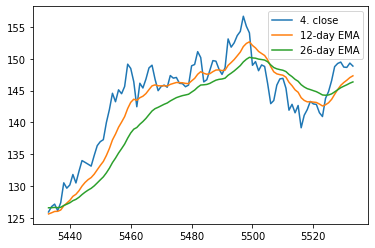

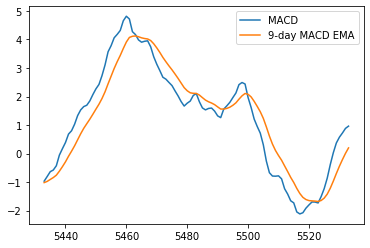

In [51]:
num_days = 100
end_index = rev_daily["index"][0]
start_index = end_index - num_days
rev_daily.iloc[start_index:end_index + 1].plot(y=["4. close", "12-day EMA", "26-day EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD", "9-day MACD EMA"])

## MACD decision points

In [52]:
rev_daily["MACD Signals"] = rev_daily.loc[:,"MACD"] - rev_daily.loc[:,"9-day MACD EMA"]
#print(rev_daily)
rev_daily["MACD Bull"] = np.where((rev_daily["MACD Signals"] > 0) & (rev_daily["MACD Signals"].shift() < 0), 1, 0)
#print(rev_daily.loc[rev_daily["MACD bull"] == 1])
rev_daily["MACD Bear"] = np.where((rev_daily["MACD Signals"] < 0) & (rev_daily["MACD Signals"].shift() > 0), 1, 0)
#print(rev_daily.loc[rev_daily["MACD bear"] == 1])
print(rev_daily)

      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  200-day SMA   6-day EMA  \
0    

In [53]:
# Change in MACD
rev_daily["MACD Change"] = rev_daily["MACD"] - rev_daily["MACD"].shift()
print(rev_daily[["MACD", "9-day MACD EMA", "MACD Change"]])

          MACD  9-day MACD EMA  MACD Change
0     0.000000        0.000000          NaN
1     0.059006        0.032781     0.059006
2     0.113948        0.066046     0.054942
3     0.212686        0.115721     0.098738
4     0.448487        0.214712     0.235801
...        ...             ...          ...
5529  0.372237       -0.698312     0.343206
5530  0.573869       -0.443876     0.201632
5531  0.721314       -0.210838     0.147445
5532  0.882859        0.007901     0.161545
5533  0.961871        0.198695     0.079012

[5534 rows x 3 columns]


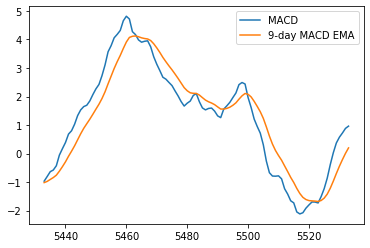

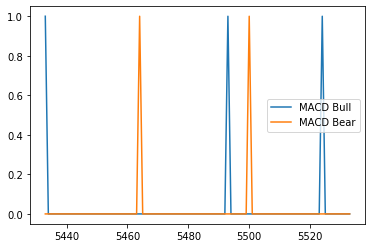

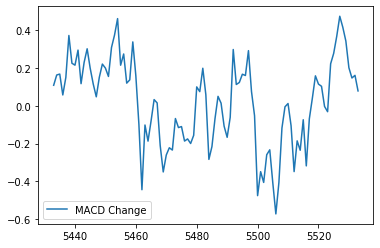

In [54]:
# Plot MACD with decision points
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD", "9-day MACD EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Bull", "MACD Bear"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Change"])
#rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Bull", "MACD Bear"], kind="bar", color=["green", "red"])
## TODO: Bar charts aren't working properly

## RSI

In [55]:
# RSI - Relative Strength Indicator
# Magnitude of recent price changes, indicate overbought or oversold conditions
# Oscillator with values from 0 to 100
# Over-bought/over-valued: RSI >= 70
# Under-bought/under-valued: RSI <= 30
# Need change in price per period
rev_daily["Close Change"] = rev_daily["4. close"] - rev_daily["4. close"].shift()
rev_daily["Up Changes"] = np.where(rev_daily["Close Change"] > 0, rev_daily["Close Change"], 0)
rev_daily["Down Changes"] = np.where(rev_daily["Close Change"] < 0, abs(rev_daily["Close Change"]), 0)
rsi_length = 14
add_sma(rev_daily, "Up Changes", rsi_length, "Up Avg")
add_sma(rev_daily, "Down Changes", rsi_length, "Down Avg")
rev_daily["RSI"] = 100 - (100 / (1 + (rev_daily["Up Avg"] / rev_daily["Down Avg"])))
print(rev_daily)

      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  ...  MACD Signals  MACD Bull  \


In [56]:
# RSI Add Function
def add_rsi(data, header, length, label):
    data["Close Change"] = data[header] - data[header].shift()
    data["Up Changes"] = np.where(data["Close Change"] > 0, data["Close Change"], 0)
    data["Down Changes"] = np.where(data["Close Change"] < 0, abs(data["Close Change"]), 0)
    add_sma(data, "Up Changes", length, "Up Avg")
    add_sma(data, "Down Changes", length, "Down Avg")
    data[label] = 100 - (100 / (1 + (data["Up Avg"] / data["Down Avg"])))
    data = data.drop(columns=["Close Change", "Up Changes", "Down Changes", "Up Avg", "Down Avg"])

In [57]:
# Test RSI Add Function
header = "4. close"
length = 14
label = "14-day RSI"
rev_daily = rev_daily.drop(columns=["Close Change", "Up Changes", "Down Changes", "Up Avg", "Down Avg"])
print("Before adding RSI")
print(rev_daily)
add_rsi(rev_daily, header, length, label)
print("\nAfter adding RSI")
print(rev_daily)

Before adding RSI
      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  ...   6-day EM

## RSI Decision Points

In [58]:
rev_daily["RSI Overbought"] = np.where(rev_daily["RSI"] >= 70, 1, 0)
rev_daily["RSI Oversold"] = np.where(rev_daily["RSI"] <= 30, 1, 0)
print(rev_daily)

      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  ...  MACD Change        RSI  \
0

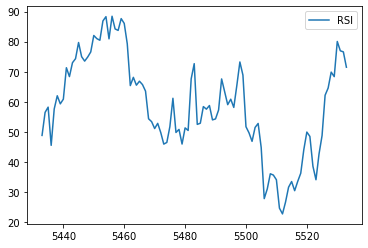

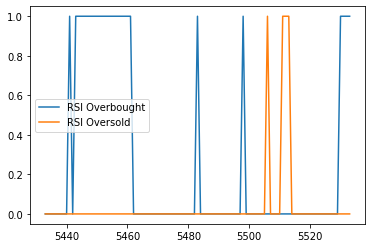

In [59]:
# Plot RSI with decision points
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI Overbought", "RSI Oversold"])
#rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI Overbought", "RSI Oversold"], kind="bar", color=["red", "green"])

## Bollinger Bands

In [87]:
# STD Add Function
def add_std(data, header, length, label):
    data[label] = data.rolling(window=length)[header].std(ddof = 0)

In [88]:
# Bollinger Bands
# Upper and lower bounds of price based on standard deviations
# BOL UP = SMA(TP, n) + m*sigma(TP, n)
# BOL DW = SMA(TP, n) - m*sigma(TP, n)
# TP, typical price = (high + low + close) / 3
# n = number of days for average (usually 20)
# m = number of standard deviations (usually 2)
# sigma = standard deviation on TP over n days
typ_lab = "Typical Price"
rev_daily[typ_lab] = (rev_daily["2. high"] + rev_daily["3. low"] + rev_daily["4. close"]) / 3
n = 20
m = 2
typ_sma_lab = "Typical 20-day SMA"
add_sma(rev_daily, typ_lab, n, typ_sma_lab)
typ_std_lab = "Typical 20-day STD"
add_std(rev_daily, typ_lab, n, typ_std_lab)
rev_daily["Bollinger Upper"] = rev_daily[typ_sma_lab] + m*rev_daily[typ_std_lab]
rev_daily["Bollinger Lower"] = rev_daily[typ_sma_lab] - m*rev_daily[typ_std_lab]
rev_daily
# NOTE: Width is just equal to 2*m*std
#rev_daily["Bollinger Width"] = rev_daily["Bollinger Upper"] - rev_daily["Bollinger Lower"]
#rev_daily.drop(columns=["Bollinger Width"])


,index,date,1. open,2. high,3. low,4. close,5. volume,6-day SMA,50-day SMA,100-day SMA,...,Down Avg,14-day RSI,RSI Overbought,RSI Oversold,Bollinger Width,Typical Price,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower
0,5533,1999-11-01,80.00,80.69,77.3700,77.62,2487300.0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,78.560000,NaN,NaN,NaN,NaN
1,5532,1999-11-02,78.00,81.69,77.3100,80.25,3564600.0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,79.750000,NaN,NaN,NaN,NaN
2,5531,1999-11-03,81.62,83.25,81.0000,81.50,2932700.0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,81.916667,NaN,NaN,NaN,NaN
3,5530,1999-11-04,82.06,85.37,80.6200,83.62,3384700.0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,83.203333,NaN,NaN,NaN,NaN
4,5529,1999-11-05,84.62,88.37,84.0000,88.31,3721500.0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,86.893333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,4,2021-10-21,148.81,149.64,147.8700,149.48,61420990.0,147.108333,147.2546,143.1605,...,0.420714,68.350349,0,0,10.988036,148.996667,143.726672,2.677453,149.081578,138.371766
5530,3,2021-10-22,149.69,150.18,148.6400,148.69,58883443.0,147.930000,147.2506,143.3968,...,0.226429,80.050346,1,0,11.756883,149.170000,143.852670,2.864798,149.582266,138.123074
5531,2,2021-10-25,148.68,149.37,147.6211,148.64,50720556.0,148.563333,147.2414,143.6478,...,0.230000,76.950608,1,0,12.451277,148.543700,144.027355,3.034001,150.095357,137.959353
5532,1,2021-10-26,149.33,150.84,149.0101,149.32,60893395.0,149.025000,147.2054,143.8821,...,0.230000,76.598837,1,0,13.380016,149.723367,144.374357,3.260307,150.894970,137.853743


In [89]:
# Typical Price Add Function
def add_typ(data, high_head, low_head, close_head, label):
    data[label] = (data[high_head] + data[low_head] + data[close_head]) / 3

# Bollinger Bands Add Function
def add_bolls(data, header, length, num_sds, sma_lab, std_lab, upper_label, lower_label):
    add_sma(data, header, length, sma_lab)
    add_std(data, header, length, std_lab)
    data[upper_label] = data[sma_lab] + num_sds*data[std_lab]
    data[lower_label] = data[sma_lab] - num_sds*data[std_lab]

In [90]:
# Test Bollinger Bands Add Function
typ_lab = "Typical Price"
typ_sma_lab = "Typical 20-day SMA"
typ_std_lab = "Typical 20-day STD"
boll_up_lab = "Bollinger Upper"
boll_low_lab = "Bollinger Lower"
# Reset data frame
rev_daily = rev_daily.drop(columns=[typ_lab, typ_sma_lab, typ_std_lab, boll_up_lab, boll_low_lab])

print("Before adding Bollinger Bands")
print(rev_daily)

# Add typical price
high_head = "2. high"
low_head = "3. low"
close_head = "4. close"
add_typ(rev_daily, high_head, low_head, close_head, typ_lab)

# Add Bollinger Bands
length = 20
num_sds = 2
add_bolls(rev_daily, typ_lab, length, num_sds, typ_sma_lab, typ_std_lab, boll_up_lab, boll_low_lab)
print("\nAfter adding Bollinger Bands")
print(rev_daily)

Before adding Bollinger Bands
      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  ..

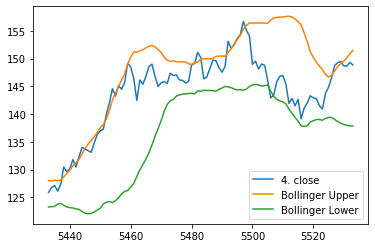

In [91]:
# Plot Bollinger Bands
rev_daily.iloc[start_index:end_index + 1].plot(y=[close_head, boll_up_lab, boll_low_lab])

## On-Balance Volume

In [106]:
# On-Balance Volume
# Trading momentum indicator
# OBV = OBV_prev + signed_volume
# signed_volume = +volume if close > close_prev, 0 if close = close_prev, and -volume if close < close_prev
# Usually change in OBV (over several days) is used rather than absolute value
# If OBV changes dramatically but price doesn't match change, then it will likely spring up or down matching OBV
vol_head = "5. volume"
close_head = "4. close"
obv_lab = "OBV"
rev_daily[obv_lab] = np.where(rev_daily[close_head] > rev_daily[close_head].shift(), 
    rev_daily[vol_head], 
    np.where(rev_daily[close_head] < rev_daily[close_head].shift(), 
             -rev_daily[vol_head],
             np.where(rev_daily.index == 0, rev_daily[vol_head], 0))).cumsum()

obv_ch_lab = "OBV Change"
obv_ch_len = 1
rev_daily[obv_ch_lab] = rev_daily[obv_lab] - rev_daily[obv_lab].shift(obv_ch_len)
rev_daily

,index,date,1. open,2. high,3. low,4. close,5. volume,6-day SMA,50-day SMA,100-day SMA,...,RSI Oversold,Bollinger Width,Typical Price,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower,prev close,OBV,OBV Change
0,5533,1999-11-01,80.00,80.69,77.3700,77.62,2487300.0,NaN,NaN,NaN,...,0,NaN,78.560000,NaN,NaN,NaN,NaN,NaN,2.487300e+06,NaN
1,5532,1999-11-02,78.00,81.69,77.3100,80.25,3564600.0,NaN,NaN,NaN,...,0,NaN,79.750000,NaN,NaN,NaN,NaN,77.62,6.051900e+06,NaN
2,5531,1999-11-03,81.62,83.25,81.0000,81.50,2932700.0,NaN,NaN,NaN,...,0,NaN,81.916667,NaN,NaN,NaN,NaN,80.25,8.984600e+06,NaN
3,5530,1999-11-04,82.06,85.37,80.6200,83.62,3384700.0,NaN,NaN,NaN,...,0,NaN,83.203333,NaN,NaN,NaN,NaN,81.50,1.236930e+07,NaN
4,5529,1999-11-05,84.62,88.37,84.0000,88.31,3721500.0,NaN,NaN,NaN,...,0,NaN,86.893333,NaN,NaN,NaN,NaN,83.62,1.609080e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,4,2021-10-21,148.81,149.64,147.8700,149.48,61420990.0,147.108333,147.2546,143.1605,...,0,10.988036,148.996667,143.726672,2.677453,149.081578,138.371766,149.26,2.868695e+09,349748181.0
5530,3,2021-10-22,149.69,150.18,148.6400,148.69,58883443.0,147.930000,147.2506,143.3968,...,0,11.756883,149.170000,143.852670,2.864798,149.582266,138.123074,149.48,2.809811e+09,222924404.0
5531,2,2021-10-25,148.68,149.37,147.6211,148.64,50720556.0,148.563333,147.2414,143.6478,...,0,12.451277,148.543700,144.027355,3.034001,150.095357,137.959353,148.69,2.759091e+09,86614673.0
5532,1,2021-10-26,149.33,150.84,149.0101,149.32,60893395.0,149.025000,147.2054,143.8821,...,0,13.380016,149.723367,144.374357,3.260307,150.894970,137.853743,148.64,2.819984e+09,71129174.0


In [107]:
# On Balance Volume Add Function
def add_obv(data, vol_header, price_header, label):
    data[label] = np.where(data[price_header] > data[price_header].shift(), 
    data[vol_header], 
    np.where(data[price_header] < data[price_header].shift(), 
             -data[vol_header],
             np.where(data.index == 0, data[vol_header], 0))).cumsum()

def add_obv_change(data, obv_label, length, change_label):
    data[change_label] = data[obv_label] - data[obv_label].shift(length)

In [112]:
# Test On Balance Volume Add Function
obv_lab = "OBV"
obv_change_lab = "OBV Change"
# Reset data frame
rev_daily = rev_daily.drop(columns=[obv_lab, obv_change_lab])

print("Before adding OBV")
print(rev_daily)

vol_head = "5. volume"
close_head = "4. close"
add_obv(rev_daily, vol_head, close_head, obv_lab)
obv_len = 10
add_obv_change(rev_daily, obv_lab, obv_len, obv_change_lab)

print("\nAfter adding OBV")
print(rev_daily)

Before adding OBV
      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  ...  14-day RS

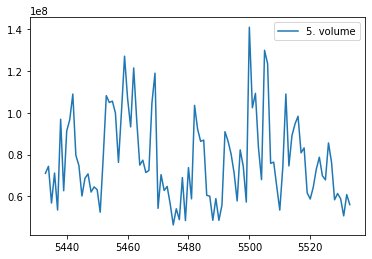

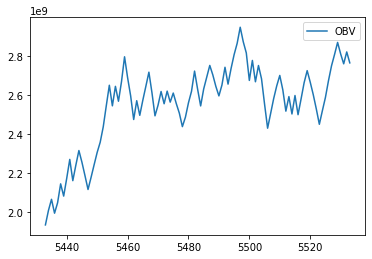

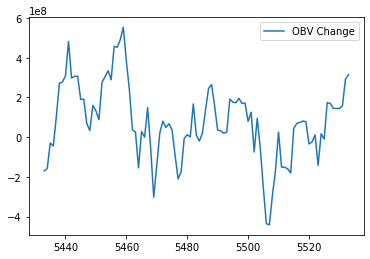

In [113]:
# Plot OBV
rev_daily.iloc[start_index:end_index + 1].plot(y=[vol_head])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_change_lab])

In [114]:
# Accumulation/distribution Indicator
# Cumulative indicator for how well volume and price are tracking together
# Money Flow Multiplier, MFM = ((Close - Low) - (High - Close)) / (High - Low)
# Money Flow Volume, MFV = MFM * Volume
# Accumulation/distribution, AD = AD_prev + MFV
high_head = "2. high"
low_head = "3. low"
close_head = "4. close"
vol_head = "5. volume"
mfm_lab = "MFM"
rev_daily[mfm_lab] = (((rev_daily[close_head] - rev_daily[low_head]) - (rev_daily[high_head] - rev_daily[close_head])) / 
                      (rev_daily[high_head] - rev_daily[low_head]))
ad_lab = "ADI"
rev_daily[ad_lab] = np.where(rev_daily.index == 0, 0, rev_daily[mfm_lab] * rev_daily[vol_head]).cumsum()
rev_daily

,index,date,1. open,2. high,3. low,4. close,5. volume,6-day SMA,50-day SMA,100-day SMA,...,Typical Price,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower,prev close,OBV,OBV Change,MFM,ADI
0,5533,1999-11-01,80.00,80.69,77.3700,77.62,2487300.0,NaN,NaN,NaN,...,78.560000,NaN,NaN,NaN,NaN,NaN,2.487300e+06,NaN,-0.849398,0.000000e+00
1,5532,1999-11-02,78.00,81.69,77.3100,80.25,3564600.0,NaN,NaN,NaN,...,79.750000,NaN,NaN,NaN,NaN,77.62,6.051900e+06,NaN,0.342466,1.220753e+06
2,5531,1999-11-03,81.62,83.25,81.0000,81.50,2932700.0,NaN,NaN,NaN,...,81.916667,NaN,NaN,NaN,NaN,80.25,8.984600e+06,NaN,-0.555556,-4.085244e+05
3,5530,1999-11-04,82.06,85.37,80.6200,83.62,3384700.0,NaN,NaN,NaN,...,83.203333,NaN,NaN,NaN,NaN,81.50,1.236930e+07,NaN,0.263158,4.821862e+05
4,5529,1999-11-05,84.62,88.37,84.0000,88.31,3721500.0,NaN,NaN,NaN,...,86.893333,NaN,NaN,NaN,NaN,83.62,1.609080e+07,NaN,0.972540,4.101494e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,4,2021-10-21,148.81,149.64,147.8700,149.48,61420990.0,147.108333,147.2546,143.1605,...,148.996667,143.726672,2.677453,149.081578,138.371766,149.26,2.868695e+09,144631327.0,0.819209,4.432650e+09
5530,3,2021-10-22,149.69,150.18,148.6400,148.69,58883443.0,147.930000,147.2506,143.3968,...,149.170000,143.852670,2.864798,149.582266,138.123074,149.48,2.809811e+09,144521039.0,-0.935065,4.377590e+09
5531,2,2021-10-25,148.68,149.37,147.6211,148.64,50720556.0,148.563333,147.2414,143.6478,...,148.543700,144.027355,3.034001,150.095357,137.959353,148.69,2.759091e+09,158252702.0,0.165190,4.385968e+09
5532,1,2021-10-26,149.33,150.84,149.0101,149.32,60893395.0,149.025000,147.2054,143.8821,...,149.723367,144.374357,3.260307,150.894970,137.853743,148.64,2.819984e+09,292181956.0,-0.661293,4.345700e+09


In [115]:
# Accumulation/Distribution Indicator Add Function
def add_adi(data, vol_header, low_header, high_header, close_header, mfm_label, label):
    data[mfm_label] = (((data[close_header] - data[low_header]) - (data[high_header] - data[close_header])) / 
                      (data[high_header] - data[low_header]))
    data[label] = np.where(data.index == 0, 0, data[mfm_label] * data[vol_header]).cumsum()

In [157]:
# Test Accumulation/Distribution Indicator Add Function
mfm_lab = "MFM"
adi_lab = "ADI"
# Reset data frame
rev_daily = rev_daily.drop(columns=[mfm_lab, adi_lab])

print("Before adding ADI")
print(rev_daily)

high_head = "2. high"
low_head = "3. low"
close_head = "4. close"
vol_head = "5. volume"
add_adi(rev_daily, vol_head, low_head, high_head, close_head, mfm_lab, adi_lab)

print("\nAfter adding ADI")
print(rev_daily)

Before adding ADI
      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day SMA  ...  True Max 

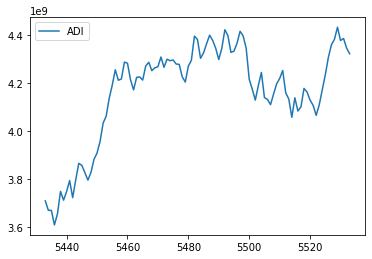

In [118]:
# Plot ADI
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])

In [133]:
# Stochastic Oscillator
# Compares a closing price with its historical range of closing prices
# Can be adjusted by varying the time frame or taking the SMA of it
# Indicates momentum
# Ranges from 0 to 100
# %K = (C - L_14) / (H_14 - L_14) * 100
# K is the stochastic oscillator
# C is the current close
# L is the lowest close in the past 14 days (for example)
# H is the highest close in the past 14 days (for example)
# Values >80 considered overbought
# Values <20 considered oversold
close_head = "4. close"
length = 14
sto_lab = "Stochastic Oscillator"
rev_daily[sto_lab] = 100*((rev_daily[close_head] - rev_daily[close_head].rolling(window=length).min()) /
                          (rev_daily[close_head].rolling(window=length).max() - rev_daily[close_head].rolling(window=length).min()))
rev_daily

,index,date,1. open,2. high,3. low,4. close,5. volume,6-day SMA,50-day SMA,100-day SMA,...,Typical 20-day SMA,Typical 20-day STD,Bollinger Upper,Bollinger Lower,prev close,OBV,OBV Change,MFM,ADI,Stochastic Oscillator
0,5533,1999-11-01,80.00,80.69,77.3700,77.62,2487300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.487300e+06,NaN,-0.849398,0.000000e+00,NaN
1,5532,1999-11-02,78.00,81.69,77.3100,80.25,3564600.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,77.62,6.051900e+06,NaN,0.342466,1.220753e+06,NaN
2,5531,1999-11-03,81.62,83.25,81.0000,81.50,2932700.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.25,8.984600e+06,NaN,-0.555556,-4.085244e+05,NaN
3,5530,1999-11-04,82.06,85.37,80.6200,83.62,3384700.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.50,1.236930e+07,NaN,0.263158,4.821862e+05,NaN
4,5529,1999-11-05,84.62,88.37,84.0000,88.31,3721500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.62,1.609080e+07,NaN,0.972540,4.101494e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,4,2021-10-21,148.81,149.64,147.8700,149.48,61420990.0,147.108333,147.2546,143.1605,...,143.726672,2.677453,149.081578,138.371766,149.26,2.868695e+09,144631327.0,0.819209,4.432650e+09,100.000000
5530,3,2021-10-22,149.69,150.18,148.6400,148.69,58883443.0,147.930000,147.2506,143.3968,...,143.852670,2.864798,149.582266,138.123074,149.48,2.809811e+09,144521039.0,-0.935065,4.377590e+09,90.781797
5531,2,2021-10-25,148.68,149.37,147.6211,148.64,50720556.0,148.563333,147.2414,143.6478,...,144.027355,3.034001,150.095357,137.959353,148.69,2.759091e+09,158252702.0,0.165190,4.385968e+09,90.198366
5532,1,2021-10-26,149.33,150.84,149.0101,149.32,60893395.0,149.025000,147.2054,143.8821,...,144.374357,3.260307,150.894970,137.853743,148.64,2.819984e+09,292181956.0,-0.661293,4.345700e+09,98.133022


In [134]:
# Stochastic Oscillator Add Function
def add_sto(data, header, length, label):
    data[label] = 100*((data[header] - data[header].rolling(window=length).min()) /
                       (data[header].rolling(window=length).max() - data[header].rolling(window=length).min()))
    

In [135]:
# Test Stochastic Oscillator Add Function
sto_lab = "Stochastic Oscillator"
# Reset data frame
rev_daily = rev_daily.drop(columns=[sto_lab])

print("Before adding Stochastic Oscillator")
print(rev_daily)

close_head = "4. close"
length = 14
add_sto(rev_daily, close_head, length, sto_lab)

print("\nAfter adding Stochastic Oscillator")
print(rev_daily)

Before adding Stochastic Oscillator
      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-day S

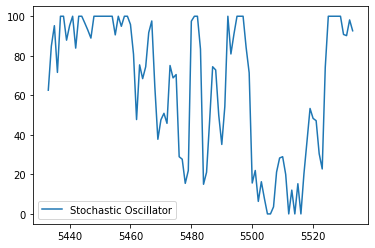

In [136]:
# Plot Stochastic Oscillator
rev_daily.iloc[start_index:end_index + 1].plot(y=[sto_lab])

In [158]:
# Average Directional Index (ADX)
# Determines the strength of a trend
# Includes 3 lines: the positive, negative, and average directional indicators
# A strong trend is when ADX > 25, weak or missing when ADX < 20
# Complicated calculation based on current and previous highs and lows
# Start with Average True Range (ATR)
# Range is high - low
# True range is high - low including yesterday's close as high or low
# Average True Range first takes the arithmetic mean of the first n periods,
# and then each subsequent one is (ATR_(t-1)*(n-1) + TR_t)/n (weighing most recent value exponentially less)
high_head = "2. high"
low_head = "3. low"
close_head = "4. close"
max_lab = "True Max"
min_lab = "True Min"
tr_lab = "TR"
atr_lab = "ATR"
length = 14
rev_daily[max_lab] = np.where(rev_daily[high_head] >= rev_daily[close_head].shift(), rev_daily[high_head], rev_daily[close_head].shift())
rev_daily[min_lab] = np.where(rev_daily[low_head] < rev_daily[close_head].shift(), rev_daily[low_head], rev_daily[close_head].shift())
rev_daily[tr_lab] = rev_daily[max_lab] - rev_daily[min_lab]
def smoothed(data, lab, length):
    return np.where(data.index <= length, 
                    data[lab].rolling(window=length).mean(), 
                    (data[lab].shift()*(length - 1) + data[lab]) / length)
rev_daily[atr_lab] = smoothed(rev_daily, tr_lab, length)

# Next calculate positive and negative directional movement, PDM and NDM
# PDM is the UpMove when the current high is greater than the previous high and greater than the DownMove
# NDM is the DownMove when the previous low is greater than the current low and greater than the UpMove
um_lab = "UpMove"
dm_lab = "DownMove"
rev_daily[um_lab] = rev_daily[high_head] - rev_daily[high_head].shift()
rev_daily[dm_lab] = rev_daily[low_head].shift() - rev_daily[low_head]
pdm_lab = "+DM"
ndm_lab = "-DM"
rev_daily[pdm_lab] = np.where((rev_daily[um_lab] > rev_daily[dm_lab]) & (rev_daily[um_lab] > 0),
                             rev_daily[um_lab], 0)
rev_daily[ndm_lab] = np.where((rev_daily[dm_lab] > rev_daily[um_lab]) & (rev_daily[dm_lab] > 0),
                             rev_daily[dm_lab], 0)
# Positive and negative directional indicator, PDI and NDI
# Smoothed versions of the PDM and NDM divided by the ATR times 100
pdi_lab = "+DI"
ndi_lab = "-DI"
rev_daily[pdi_lab] = 100*smoothed(rev_daily, pdm_lab, length) / rev_daily[atr_lab]
rev_daily[ndi_lab] = 100*smoothed(rev_daily, ndm_lab, length) / rev_daily[atr_lab]
# The Average Directional Index, ADI
# ADI = 100*abs(PDI - NDI) / (PDI + NDI)
adx_lab = "ADX"
rev_daily[adx_lab] = (100*(rev_daily[pdi_lab] - rev_daily[ndi_lab]) / (rev_daily[pdi_lab] + rev_daily[ndi_lab])).abs()
rev_daily


,index,date,1. open,2. high,3. low,4. close,5. volume,6-day SMA,50-day SMA,100-day SMA,...,ATR,UpMove,DownMove,+DM,-DM,+DI,-DI,MFM,ADI,ADX
0,5533,1999-11-01,80.00,80.69,77.3700,77.62,2487300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.0000,NaN,NaN,-0.849398,0.000000e+00,NaN
1,5532,1999-11-02,78.00,81.69,77.3100,80.25,3564600.0,NaN,NaN,NaN,...,NaN,1.0000,0.0600,1.00,0.0000,NaN,NaN,0.342466,1.220753e+06,NaN
2,5531,1999-11-03,81.62,83.25,81.0000,81.50,2932700.0,NaN,NaN,NaN,...,NaN,1.5600,-3.6900,1.56,0.0000,NaN,NaN,-0.555556,-4.085244e+05,NaN
3,5530,1999-11-04,82.06,85.37,80.6200,83.62,3384700.0,NaN,NaN,NaN,...,NaN,2.1200,0.3800,2.12,0.0000,NaN,NaN,0.263158,4.821862e+05,NaN
4,5529,1999-11-05,84.62,88.37,84.0000,88.31,3721500.0,NaN,NaN,NaN,...,NaN,3.0000,-3.3800,3.00,0.0000,NaN,NaN,0.972540,4.101494e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,4,2021-10-21,148.81,149.64,147.8700,149.48,61420990.0,147.108333,147.2546,143.1605,...,1.643621,-0.1139,0.2500,0.00,0.2500,32.987697,1.086451,0.819209,4.432650e+09,93.623018
5530,3,2021-10-22,149.69,150.18,148.6400,148.69,58883443.0,147.930000,147.2506,143.3968,...,1.753571,0.5400,-0.7700,0.54,0.0000,2.199593,13.238289,-0.935065,4.377590e+09,71.503958
5531,2,2021-10-25,148.68,149.37,147.6211,148.64,50720556.0,148.563333,147.2414,143.6478,...,1.554921,-0.8100,1.0189,0.00,1.0189,32.247840,4.680530,0.165190,4.385968e+09,74.650761
5532,1,2021-10-26,149.33,150.84,149.0101,149.32,60893395.0,149.025000,147.2054,143.8821,...,1.781121,1.4700,-1.3890,1.47,0.0000,5.895162,53.119423,-0.661293,4.345700e+09,80.021338


In [161]:
# Average Directional Index (ADX) Add Function
def smoothed(data, lab, length):
    return np.where(data.index <= length, 
                    data[lab].rolling(window=length).mean(), 
                    (data[lab].shift()*(length - 1) + data[lab]) / length)

def add_adx(data, high, low, close, length, atr_label, pdi_label, ndi_label, label):
    max_lab = "True Max"
    min_lab = "True Min"
    tr_lab = "TR"
    um_lab = "UpMove"
    dm_lab = "DownMove"
    pdm_lab = "+DM"
    ndm_lab = "-DM"
    temp_labs = [max_lab, min_lab, tr_lab, um_lab, dm_lab, pdm_lab, ndm_lab]
    data[max_lab] = np.where(data[high] >= data[close].shift(), data[high], data[close].shift())
    data[min_lab] = np.where(data[low] < data[close].shift(), data[low], data[close].shift())
    data[tr_lab] = data[max_lab] - data[min_lab]
    data[atr_label] = smoothed(data, tr_lab, length)
    data[um_lab] = data[high] - data[high].shift()
    data[dm_lab] = data[low].shift() - data[low]
    data[pdm_lab] = np.where((data[um_lab] > data[dm_lab]) & (data[um_lab] > 0),
                              data[um_lab], 0)
    data[ndm_lab] = np.where((data[dm_lab] > data[um_lab]) & (data[dm_lab] > 0),
                              data[dm_lab], 0)
    data[pdi_label] = 100*smoothed(data, pdm_lab, length) / data[atr_label]
    data[ndi_label] = 100*smoothed(data, ndm_lab, length) / data[atr_label]
    data[label] = (100*(data[pdi_label] - data[ndi_label]) / (data[pdi_label] + data[ndi_label])).abs()
    data = data.drop(columns=temp_labs)

In [163]:
# Test Average Directional Index (ADX) Add Function
atr_lab = "ATR"
pdi_lab = "+DI"
ndi_lab = "-DI"
adx_lab = "ADX"
# Reset data frame
rev_daily = rev_daily.drop(columns=[atr_lab, pdi_lab, ndi_lab, adx_lab])

print("Before adding Average Directional Index")
print(rev_daily)

high_head = "2. high"
low_head = "3. low"
close_head = "4. close"
length = 14
add_adx(rev_daily, high_head, low_head, close_head, length, atr_lab, pdi_lab, ndi_lab, adx_lab)

print("\nAfter adding Average Directional Index")
print(rev_daily)

Before adding Average Directional Index
      index        date  1. open  2. high    3. low  4. close   5. volume  \
0      5533  1999-11-01    80.00    80.69   77.3700     77.62   2487300.0   
1      5532  1999-11-02    78.00    81.69   77.3100     80.25   3564600.0   
2      5531  1999-11-03    81.62    83.25   81.0000     81.50   2932700.0   
3      5530  1999-11-04    82.06    85.37   80.6200     83.62   3384700.0   
4      5529  1999-11-05    84.62    88.37   84.0000     88.31   3721500.0   
...     ...         ...      ...      ...       ...       ...         ...   
5529      4  2021-10-21   148.81   149.64  147.8700    149.48  61420990.0   
5530      3  2021-10-22   149.69   150.18  148.6400    148.69  58883443.0   
5531      2  2021-10-25   148.68   149.37  147.6211    148.64  50720556.0   
5532      1  2021-10-26   149.33   150.84  149.0101    149.32  60893395.0   
5533      0  2021-10-27   149.36   149.73  148.4900    148.85  56094929.0   

       6-day SMA  50-day SMA  100-d

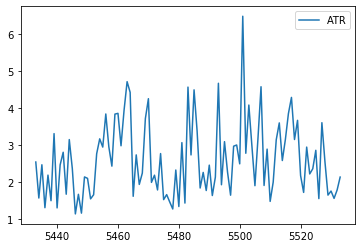

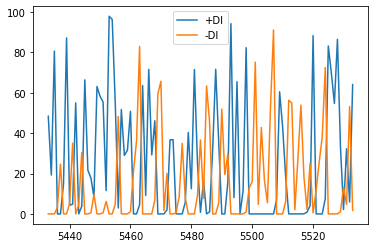

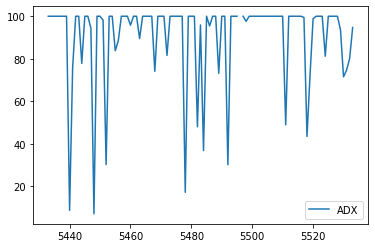

In [169]:
# Plot Average Divergence Index
rev_daily.iloc[start_index:end_index + 1].plot(y=[atr_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[pdi_lab, ndi_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])


In [170]:
#Fibonacci Retracement
#Ichimoku

# Plot everything together

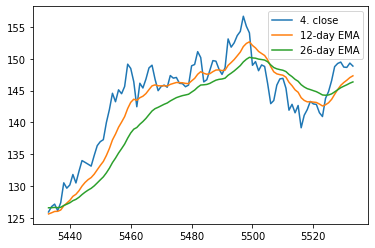

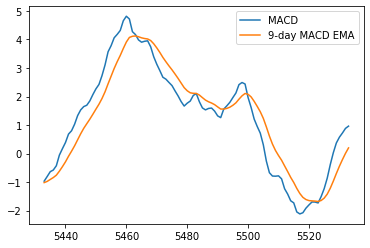

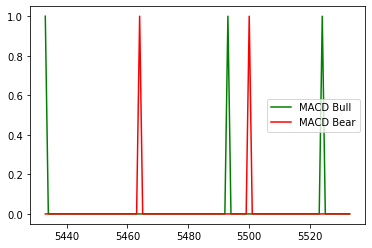

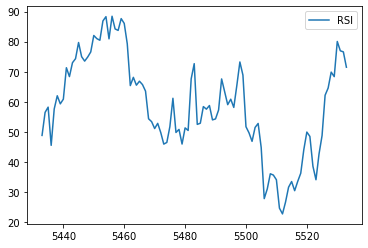

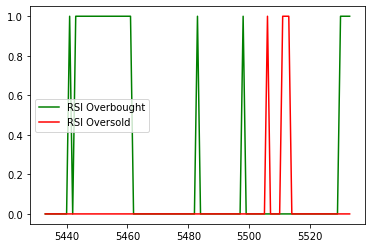

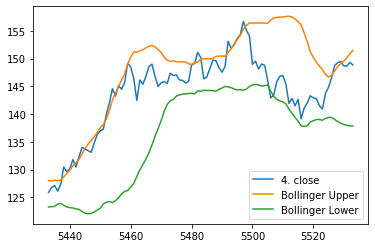

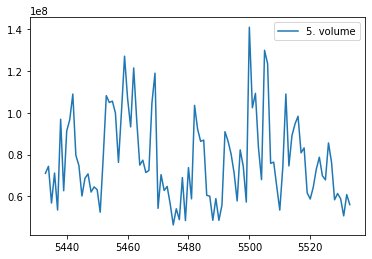

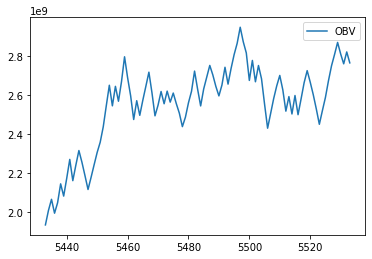

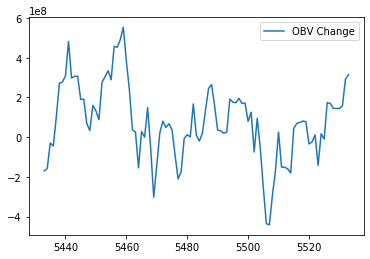

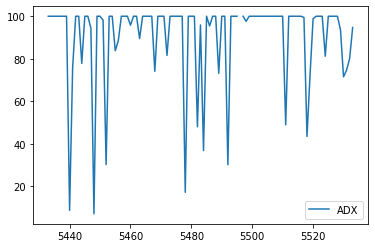

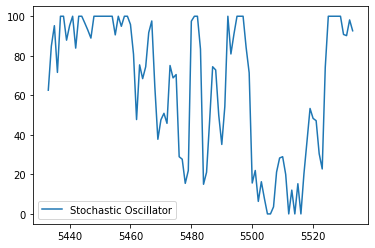

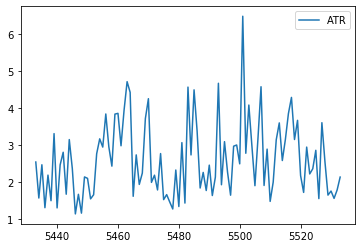

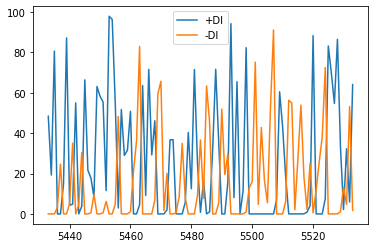

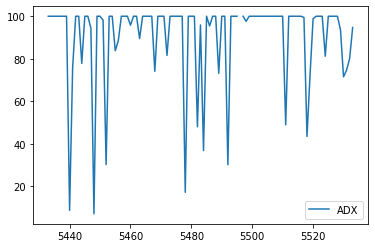

In [171]:
# All plots together
num_days = 100
end_index = rev_daily["index"][0]
start_index = end_index - num_days
rev_daily.iloc[start_index:end_index + 1].plot(y=["4. close", "12-day EMA", "26-day EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD", "9-day MACD EMA"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["MACD Bull", "MACD Bear"], color=["g", "r"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI"])
rev_daily.iloc[start_index:end_index + 1].plot(y=["RSI Overbought", "RSI Oversold"], color=["g", "r"])
rev_daily.iloc[start_index:end_index + 1].plot(y=[close_head, boll_up_lab, boll_low_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[vol_head])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[obv_change_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[sto_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[atr_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[pdi_lab, ndi_lab])
rev_daily.iloc[start_index:end_index + 1].plot(y=[adi_lab])